In [1]:
import pandas as pd
from scipy.stats import spearmanr

In [54]:
# filepath = 'ssid_lden_biodiv_kopie_bbox02.csv'
# df_ssid = pd.read_csv(filepath)

In [2]:
# filepath = 'ssid_lden_biodiv_kopie.csv'
filepath =  'ssid_all_london_01.csv'
df_ssid01 = pd.read_csv(filepath)

In [4]:
# Define the mapping for the labels
label_mapping = {
    1: ">75",
    2: "70.0-74.9",
    3: "65.0-69.9",
    4: "60.0-64.9",
    5: "55.0-59.9",
    6: "<55"
}

# Replace the labels in the dataframe
df_ssid01['NoiseCla_2'] = df_ssid01['NoiseCla_1'].replace(label_mapping)


In [5]:
df_ssid01

,LocationID,SessionID,GroupID,RecordID,Language,Lockdown,start_time,end_time,latitude,longitude,...,B_prob,PARKSDISTAN,fountainsvi,roadnoiseco,treesvisibi,vi20mbigger,DISTANCE,SVF,VISIBLE,NoiseCla_2
0,CamdenTown,CamdenTown1,CT101,525,English,0,2-5-2019 11:40,2-5-2019 11:43,51.539124,-0.142624,...,0.0,-200.000000,0.0,85.000000,1.0,0.969707,62.665019,0.930022,86.555072,>75
1,CamdenTown,CamdenTown1,CT101,561,English,0,2-5-2019 11:40,2-5-2019 11:43,51.539124,-0.142624,...,0.0,-200.000000,0.0,85.000000,1.0,0.969707,62.665019,0.930022,86.555072,>75
2,CamdenTown,CamdenTown1,CT101,526,English,0,2-5-2019 11:41,2-5-2019 11:44,51.539124,-0.142624,...,0.0,-200.000000,0.0,85.000000,1.0,0.969707,62.665019,0.930022,86.555072,>75
3,CamdenTown,CamdenTown1,CT102,560,English,0,2-5-2019 11:50,2-5-2019 11:53,51.539124,-0.142624,...,0.0,-200.000000,0.0,85.000000,1.0,0.969707,62.665019,0.930022,86.555072,>75
4,CamdenTown,CamdenTown1,CT103,527,English,0,2-5-2019 11:49,2-5-2019 11:54,51.539124,-0.142624,...,0.0,-200.000000,0.0,85.000000,1.0,0.969707,62.665019,0.930022,86.555072,>75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,TorringtonSq,TorringtonSq4,TS426,1279,English,0,22-10-2019 14:10,22-10-2019 14:16,51.523300,-0.131100,...,0.0,-29.699896,0.0,60.005878,17.0,1.000000,66.094421,0.911364,84.273617,<55
1328,TorringtonSq,TorringtonSq4,TS426,1278,English,0,22-10-2019 14:12,22-10-2019 14:16,51.523300,-0.131100,...,0.0,-29.699896,0.0,60.005878,17.0,1.000000,66.094421,0.911364,84.273617,<55
1329,TorringtonSq,TorringtonSq4,TS426,1281,English,0,22-10-2019 14:12,22-10-2019 14:15,51.523300,-0.131100,...,0.0,-29.699896,0.0,60.005878,17.0,1.000000,66.094421,0.911364,84.273617,<55
1330,TorringtonSq,TorringtonSq4,TS426,1280,English,0,22-10-2019 14:12,22-10-2019 14:16,51.523300,-0.131100,...,0.0,-29.699896,0.0,60.005878,17.0,1.000000,66.094421,0.911364,84.273617,<55


In [6]:
import numpy as np

In [7]:
# Step 1: Group by identical latitude and longitude, and count the number of points in each group
grouped_stats = df_ssid01.groupby(['latitude', 'longitude']).size().reset_index(name='row_count')

# Step 2: Filter places with 5 or more points
places_with_5_or_more_points = grouped_stats[grouped_stats['row_count'] >= 3]
og_length = len(df_ssid01)
df_ssid = df_ssid01.copy()

# Step 3: Iterate over each group and remove outliers in the 'ISOPleasan' column using the Z-score method
for index, group in places_with_5_or_more_points.iterrows():
    # Filter data for the current group
    group_data = df_ssid01[(df_ssid01['latitude'] == group['latitude']) &
                            (df_ssid01['longitude'] == group['longitude'])]

    # Calculate z-scores for the 'ISOPleasan' column
    z_scores = np.abs((group_data['ISOPleasan'] - group_data['ISOPleasan'].mean()) / group_data['ISOPleasan'].std())

    # Define the threshold for outlier detection (z-score > 2)
    outlier_threshold = 3.0

    # Filter outliers based on the defined threshold
    outliers_to_remove = group_data[z_scores > outlier_threshold]

    
    # Remove outliers from the original DataFrame
    df_ssid = df_ssid.drop(outliers_to_remove.index)


# Now 'data_for_grouping' contains the DataFrame with outliers in the 'ISOPleasan' column removed using the Z-score method
print(len(df_ssid) - og_length)

-5


In [8]:
filtered_df = df_ssid[df_ssid['NoiseCla_1'] != 6]

In [9]:
print(len(df_ssid01['ISOPleasan']))
print(len(df_ssid['ISOPleasan']))
print(len(filtered_df['ISOPleasan']))
print(len(df_ssid['ISOPleasan']) -len(filtered_df['ISOPleasan']))

1332
1327
534
793


In [8]:
df_ssid.columns

Index(['LocationID', 'SessionID', 'GroupID', 'RecordID', 'Language',
       'Lockdown', 'start_time', 'end_time', 'latitude', 'longitude',
       'Traffic', 'Other', 'Human', 'Natural', 'ISOPleasan', 'ISOEventfu',
       'pleasant', 'chaotic', 'vibrant', 'uneventful', 'calm', 'annoying',
       'eventful', 'monotonous', 'Overall', 'Appropriat', 'loud', 'sss04',
       'sss05', 'who01', 'who02', 'who03', 'who04', 'who05', 'WHO_Sum', 'Age',
       'Gender', 'occ00___Em', 'occ00___Un', 'occ00___Re', 'occ00___St',
       'occ00___Ot', 'occ00___Ra', 'occ00_othe', 'Occupation', 'edu00',
       'eth00', 'eth00_othe', 'misc00', 'misc03', 'misc03_oth', 'misc04',
       'misc01', 'use00', 'uni00', 'res00___1', 'res00___2', 'res00___3',
       'res00___4', 'res00___5', 'res02', 'paper', 'RecordingL', 'Loudness_N',
       'N10_N90(so', 'Sharpness_', 'Rough_HM_R', 'Rough_HM_A', 'FS_Avg,ari',
       'I_HM_Avg,a', 'Ton_HM_Avg', 'LZeq_L(dB(', 'LAeq_L(A)(', 'LA10_LA90(',
       'LCeq_LAeq(', 'LC10_LC90

# lden and laeq and lzeq

 find out which acoustic metric the Lden correlates with

In [9]:


# Select the columns of interest
columns_of_interest = ['NoiseCla_1','LZeq_L(dB(', 'LAeq_L(A)(', 'LA10_LA90(', 'LCeq_LAeq(', 'LC10_LC90(']

# Extracting specific correlation coefficients if needed
for column1 in columns_of_interest:
        column2 = 'NoiseCla_1'
        if column1 != column2:
            spearman_coefficient, p_value = spearmanr(df_ssid[column1], df_ssid[column2], nan_policy = 'omit')
            if abs(spearman_coefficient)>0.5:
                print(f"Spearman correlation coefficient between {column1} and {column2}: {spearman_coefficient}")
                print(f"P-value between {column1} and {column2}: {p_value}")

print('filtered_df')
# Extracting specific correlation coefficients if needed
for column1 in columns_of_interest:
        column2 = 'NoiseCla_1'
        if column1 != column2:
            spearman_coefficient, p_value = spearmanr(filtered_df[column1], filtered_df[column2], nan_policy = 'omit')
            if abs(spearman_coefficient)>0.5:
                print(f"Spearman correlation coefficient between {column1} and {column2}: {spearman_coefficient}")
                print(f"P-value between {column1} and {column2}: {p_value}")

Spearman correlation coefficient between LZeq_L(dB( and NoiseCla_1: -0.6125496733820891
P-value between LZeq_L(dB( and NoiseCla_1: 5.2322459111221014e-120
Spearman correlation coefficient between LAeq_L(A)( and NoiseCla_1: -0.5380914442565484
P-value between LAeq_L(A)( and NoiseCla_1: 9.473053882793194e-88
filtered_df
Spearman correlation coefficient between LAeq_L(A)( and NoiseCla_1: -0.613055791814737
P-value between LAeq_L(A)( and NoiseCla_1: 2.7413772921980334e-51


In [10]:
## correlation Lden and LZ
from scipy.stats import spearmanr
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['NoiseCla_1'], df_ssid['LZeq_L(dB('], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(filtered_df['NoiseCla_1'], filtered_df['LZeq_L(dB('], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)



Spearman correlation coefficient: -0.6125496733820891
p-value: 5.2322459111221014e-120
Spearman correlation coefficient: -0.47076141133783533
p-value: 4.591795772273331e-28


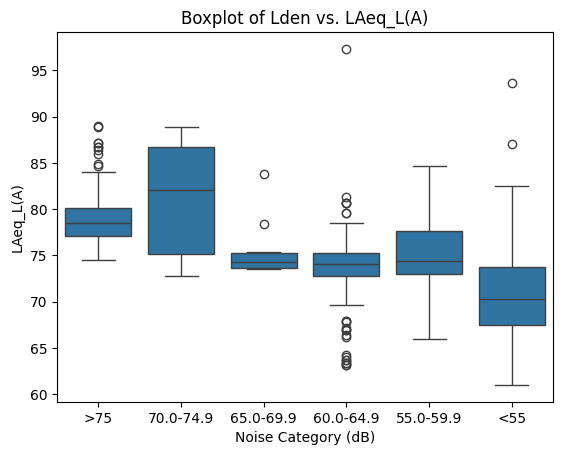

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order of categories
category_order = [">75", "70.0-74.9", "65.0-69.9", "60.0-64.9", "55.0-59.9", "<55"]

sns.boxplot(x='NoiseCla_2', y='LZeq_L(dB(', data=df_ssid, order=category_order)
plt.title('Boxplot of Lden vs. LAeq_L(A)')
plt.xlabel('Noise Category (dB)')
plt.ylabel('LAeq_L(A)')
plt.show()


# Lden and sound source type

In [199]:
# Traffic & NoiseClass
#Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['NoiseCla_1'], df_ssid['Traffic'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)
spearman_coefficient, p_value = spearmanr(filtered_df['NoiseCla_1'], filtered_df['Traffic'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)


Spearman correlation coefficient: -0.33217824724038525
p-value: 1.594043693781796e-35
Spearman correlation coefficient: -0.5050160272266828
p-value: 6.611691872702548e-36


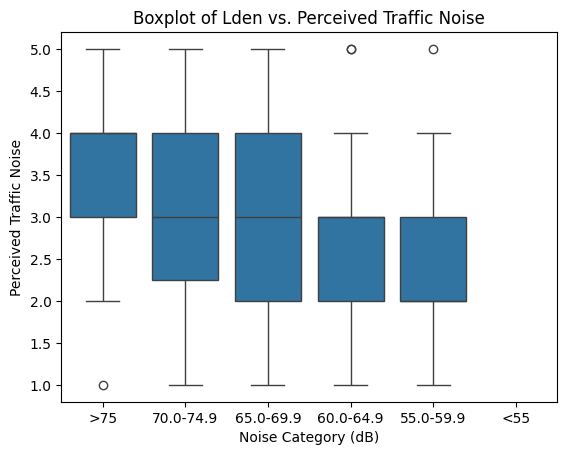

In [166]:
sns.boxplot(x='NoiseCla_2', y='Traffic', data=filtered_df, order=category_order)
plt.title('Boxplot of Lden vs. Perceived Traffic Noise')
plt.xlabel('Noise Category (dB)')
plt.ylabel('Perceived Traffic Noise')
plt.show()


In [179]:
# Naterual & NoiseClass
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['NoiseCla_1'], df_ssid['Natural'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)
# Filter rows where NoiseCla_1 is not equal to 6
filtered_df = df_ssid[df_ssid['NoiseCla_1'] != 6]

# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(filtered_df['NoiseCla_1'], filtered_df['Natural'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

Spearman correlation coefficient: 0.20604280626485785
p-value: 3.5290192748121936e-14
Spearman correlation coefficient: 0.4489638256107998
p-value: 7.561719342154262e-28


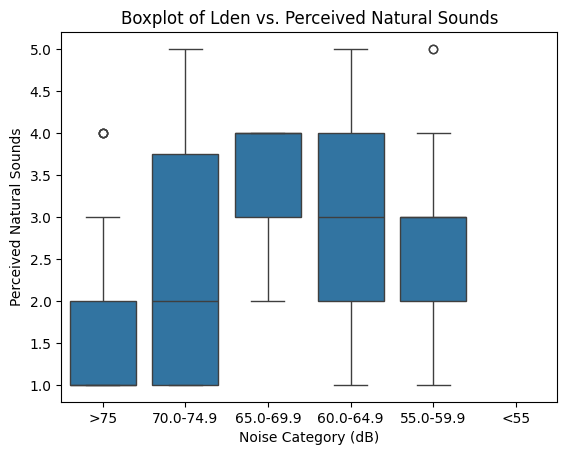

In [200]:
sns.boxplot(x='NoiseCla_2', y='Natural', data=filtered_df, order=category_order)
plt.title('Boxplot of Lden vs. Perceived Natural Sounds')
plt.xlabel('Noise Category (dB)')
plt.ylabel('Perceived Natural Sounds')
plt.show()


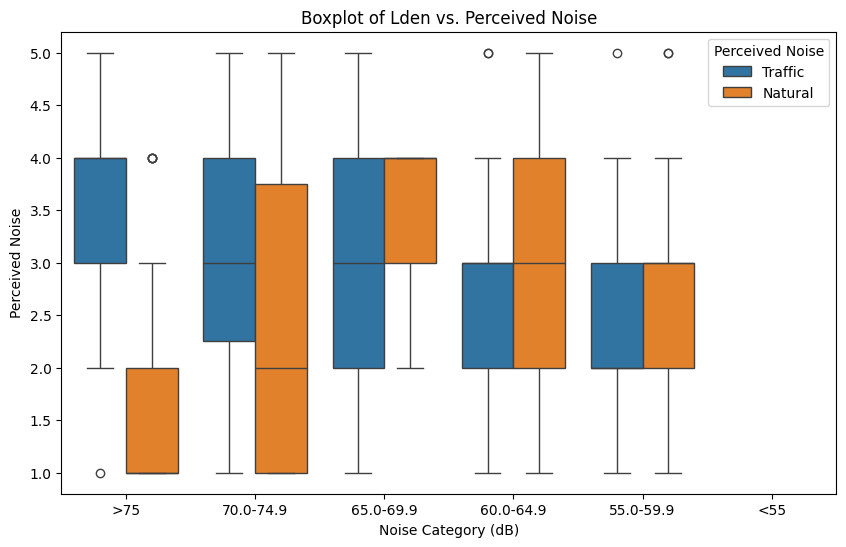

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Melt the dataframe to combine 'Traffic' and 'Natural' variables
melted_df = pd.melt(filtered_df, id_vars='NoiseCla_2', value_vars=['Traffic', 'Natural'], var_name='Perceived Noise')

# Assuming category_order is defined
category_order = [">75", "70.0-74.9", "65.0-69.9", "60.0-64.9", "55.0-59.9", "<55"]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='NoiseCla_2', y='value', hue='Perceived Noise', data=melted_df, order=category_order)

plt.title('Boxplot of Lden vs. Perceived Noise')
plt.xlabel('Noise Category (dB)')
plt.ylabel('Perceived Noise')
plt.legend(title='Perceived Noise')
plt.show()


# Lden and Pleasantness

In [194]:
#NoiseClass and ISOPleasant
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['NoiseCla_1'], df_ssid['ISOPleasan'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

spearman_coefficient, p_value = spearmanr(filtered_df['NoiseCla_1'], filtered_df['ISOPleasan'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)


Spearman correlation coefficient: 0.2818549374534979
p-value: 9.553490231532171e-26
Spearman correlation coefficient: 0.5695944089787828
p-value: 2.9683798859006294e-47


Spearman correlation coefficient: 0.2818549374534979
p-value: 9.553490231532171e-26
Spearman correlation coefficient: 0.5695944089787828
p-value: 2.9683798859006294e-47


Spearman correlation coefficient: 0.2818549374534979
p-value: 9.553490231532171e-26
Spearman correlation coefficient: 0.5807534973570586
p-value: 5.937456599224759e-48

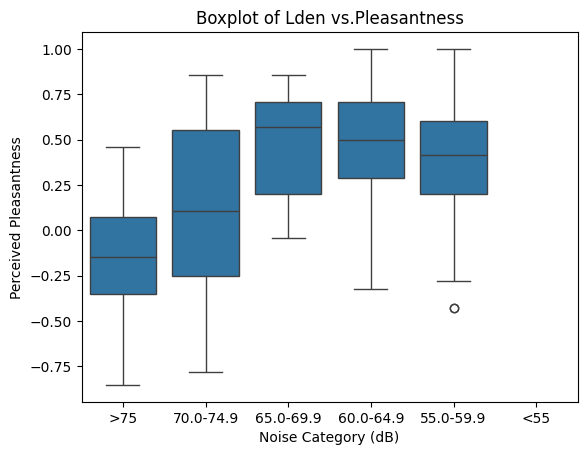

In [195]:
sns.boxplot(x='NoiseCla_2', y='ISOPleasan', data=filtered_df, order=category_order)
plt.title('Boxplot of Lden vs.Pleasantness')
plt.xlabel('Noise Category (dB)')
plt.ylabel('Perceived Pleasantness')
plt.show()


# type of landuse

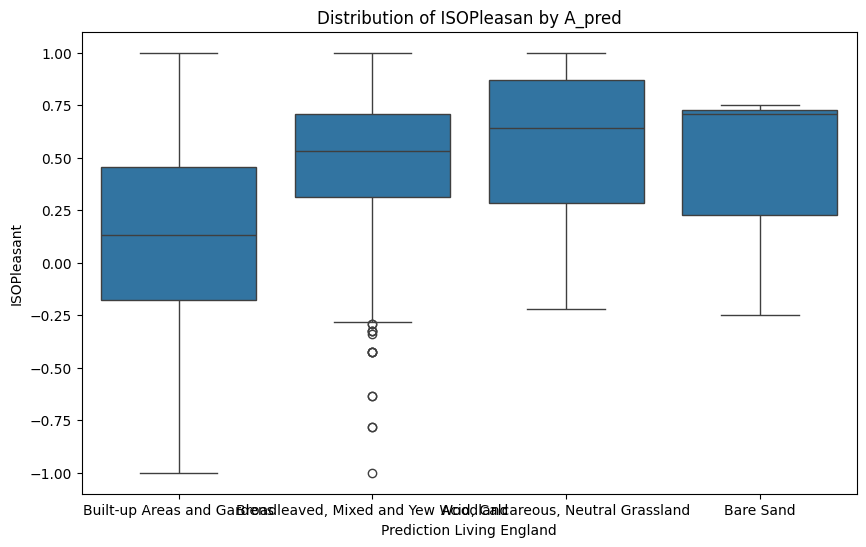

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_ssid is your dataframe
# You can adjust the figure size as needed
plt.figure(figsize=(10, 6))

# Create a boxplot or violin plot
sns.boxplot(x='A_pred', y='ISOPleasan', data=df_ssid)
# Uncomment the line below and comment out the above line to use a violin plot instead
# sns.violinplot(x='A_pred', y='ISOPleasan', data=df_ssid)

plt.title('Distribution of ISOPleasan by A_pred')
plt.xlabel('Prediction Living England')
plt.ylabel('ISOPleasant')
plt.show()


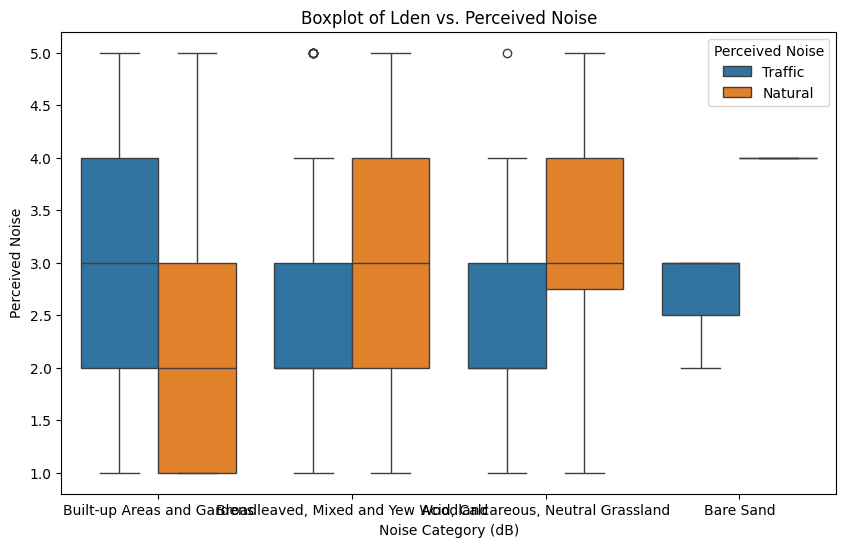

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Melt the dataframe to combine 'Traffic' and 'Natural' variables
melted_df = pd.melt(df_ssid, id_vars='A_pred', value_vars=['Traffic', 'Natural'], var_name='xx')

# Assuming category_order is defined
category_order = [">75", "70.0-74.9", "65.0-69.9", "60.0-64.9", "55.0-59.9", "<55"]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='A_pred', y='value', hue='xx', data=melted_df) #, order=category_order)

plt.title('Boxplot of Lden vs. Perceived Noise')
plt.xlabel('Noise Category (dB)')
plt.ylabel('Perceived Noise')
plt.legend(title='Perceived Noise')
plt.show()


# roadnoise contours vs Lden 

In [10]:
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['NoiseCla_1'], df_ssid['roadnoiseco'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(filtered_df['NoiseCla_1'], filtered_df['roadnoiseco'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

Spearman correlation coefficient: -0.5510407634340583
p-value: 1.2483189394635788e-102
Spearman correlation coefficient: -0.9724402995590845
p-value: 0.0


In [11]:
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['Traffic'], df_ssid['roadnoiseco'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(filtered_df['Traffic'], filtered_df['roadnoiseco'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

Spearman correlation coefficient: 0.28981478834452207
p-value: 3.4378785511166167e-26
Spearman correlation coefficient: 0.49467661501749327
p-value: 5.899063289012955e-33


In [12]:
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['Natural'], df_ssid['roadnoiseco'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

filtered_df = df_ssid[df_ssid['NoiseCla_1'] != 6]

# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(filtered_df['Natural'], filtered_df['roadnoiseco'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

Spearman correlation coefficient: -0.16262856049898522
p-value: 4.866075206314035e-09
Spearman correlation coefficient: -0.43394568062953603
p-value: 6.33257493011194e-25


In [13]:
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['ISOPleasan'], df_ssid['roadnoiseco'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

filtered_df = df_ssid[df_ssid['NoiseCla_1'] != 6]

# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(filtered_df['ISOPleasan'], filtered_df['roadnoiseco'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

Spearman correlation coefficient: -0.2751709453791267
p-value: 1.0875082211826492e-23
Spearman correlation coefficient: -0.566826819847551
p-value: 7.44337300879578e-45


In [14]:

# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['LZeq_L(dB('], df_ssid['roadnoiseco'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(filtered_df['LZeq_L(dB('], filtered_df['roadnoiseco'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

Spearman correlation coefficient: 0.42851474661148137
p-value: 3.424291218128189e-51
Spearman correlation coefficient: 0.4987602228507225
p-value: 1.7215946577798486e-30


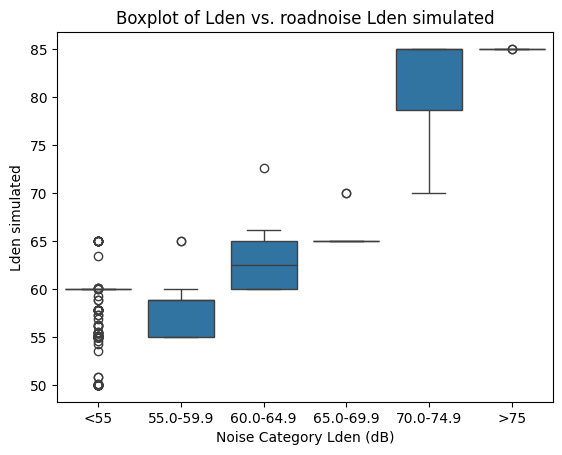

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order of categories
category_order = [">75", "70.0-74.9", "65.0-69.9", "60.0-64.9", "55.0-59.9", "<55"]
category_order = [ "<55",  "55.0-59.9", "60.0-64.9", "65.0-69.9", "70.0-74.9",">75"]

sns.boxplot(x='NoiseCla_2', y='roadnoiseco', data=df_ssid, order=category_order)
plt.title('Boxplot of Lden vs. roadnoise Lden simulated')
plt.xlabel('Noise Category Lden (dB)')
plt.ylabel('Lden simulated')
plt.show()


In [29]:
filtered_df.columns

Index(['LocationID', 'SessionID', 'GroupID', 'RecordID', 'Language',
       'Lockdown', 'start_time', 'end_time', 'latitude', 'longitude',
       'Traffic', 'Other', 'Human', 'Natural', 'ISOPleasan', 'ISOEventfu',
       'pleasant', 'chaotic', 'vibrant', 'uneventful', 'calm', 'annoying',
       'eventful', 'monotonous', 'Overall', 'Appropriat', 'loud', 'sss04',
       'sss05', 'who01', 'who02', 'who03', 'who04', 'who05', 'WHO_Sum', 'Age',
       'Gender', 'occ00___Em', 'occ00___Un', 'occ00___Re', 'occ00___St',
       'occ00___Ot', 'occ00___Ra', 'occ00_othe', 'Occupation', 'edu00',
       'eth00', 'eth00_othe', 'misc00', 'misc03', 'misc03_oth', 'misc04',
       'misc01', 'use00', 'uni00', 'res00___1', 'res00___2', 'res00___3',
       'res00___4', 'res00___5', 'res02', 'paper', 'RecordingL', 'Loudness_N',
       'N10_N90(so', 'Sharpness_', 'Rough_HM_R', 'Rough_HM_A', 'FS_Avg,ari',
       'I_HM_Avg,a', 'Ton_HM_Avg', 'LZeq_L(dB(', 'LAeq_L(A)(', 'LA10_LA90(',
       'LCeq_LAeq(', 'LC10_LC90

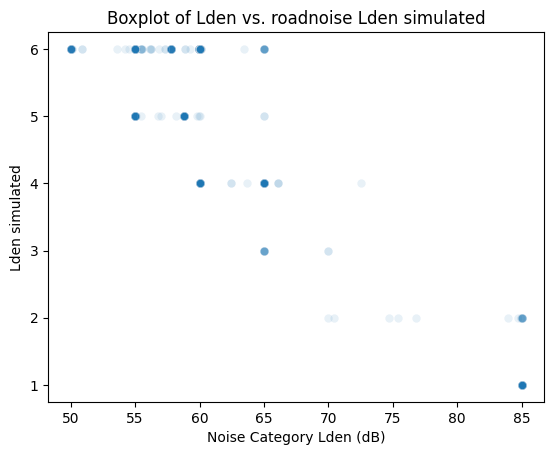

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order of categories
category_order = [">75", "70.0-74.9", "65.0-69.9", "60.0-64.9", "55.0-59.9", "<55"]
category_order = [ "<55",  "55.0-59.9", "60.0-64.9", "65.0-69.9", "70.0-74.9",">75"]

sns.scatterplot(x='roadnoiseco', y='NoiseCla_1', data=df_ssid, alpha = 0.1) #, order=category_order)
plt.title('Boxplot of Lden vs. roadnoise Lden simulated')
plt.xlabel('Noise Category Lden (dB)')
plt.ylabel('Lden simulated')
plt.show()


# parksdistance and other factors


In [10]:
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['PARKSDISTAN'], df_ssid['Natural'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(filtered_df['PARKSDISTAN'], filtered_df['Natural'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)


Spearman correlation coefficient: 0.5469498587878646
p-value: 2.5368945196338814e-104
Spearman correlation coefficient: 0.560531518772199
p-value: 1.6508076760243358e-45


In [11]:
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['PARKSDISTAN'], df_ssid['Traffic'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(filtered_df['PARKSDISTAN'], filtered_df['Traffic'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)


Spearman correlation coefficient: -0.334746141285018
p-value: 4.4179750323577834e-36
Spearman correlation coefficient: -0.39821538200537754
p-value: 9.738244692499666e-22


In [69]:
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['PARKSDISTAN'], df_ssid['ISOPleasan'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

spearman_coefficient, p_value = spearmanr(filtered_df['PARKSDISTAN'], filtered_df['ISOPleasan'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)


Spearman correlation coefficient: 0.4836034689284053
p-value: 5.183827612832613e-79
Spearman correlation coefficient: 0.5857086379963481
p-value: 1.7074211731662457e-50


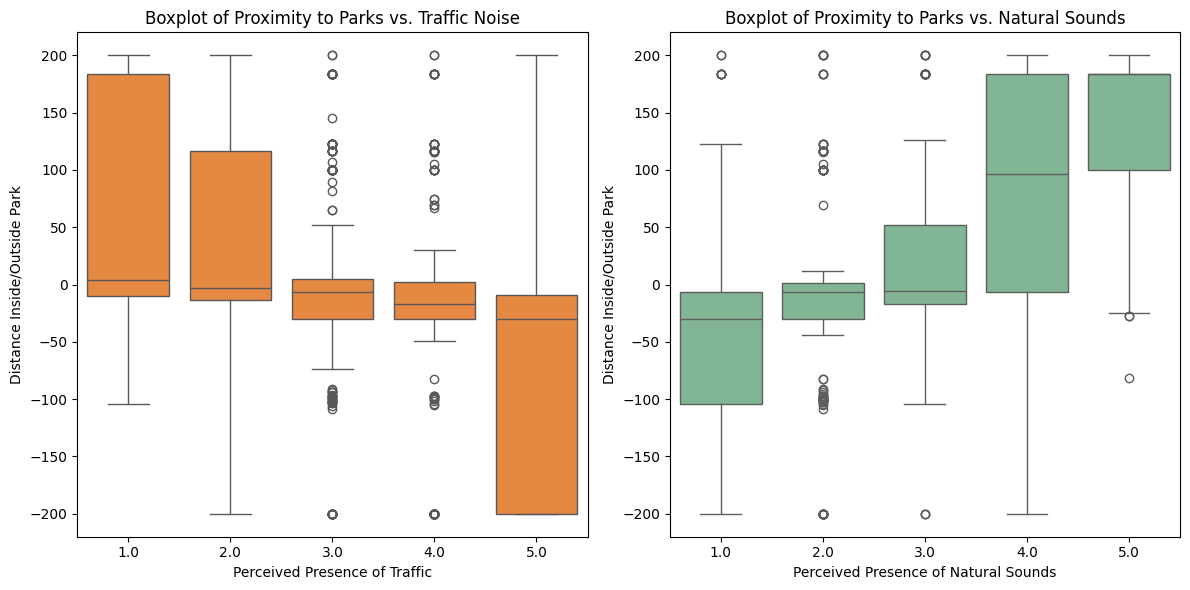

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Define a custom color palette
custom_palette = {'Traffic': '#ff8427', 'Natural': '#7abd91'}

# Boxplot for Traffic
sns.boxplot(ax=axes[0], x='Traffic', y='PARKSDISTAN', data=df_ssid, color = '#ff8427')
axes[0].set_title('Boxplot of Proximity to Parks vs. Traffic Noise')
axes[0].set_xlabel('Perceived Presence of Traffic')
axes[0].set_ylabel('Distance Inside/Outside Park')

# Boxplot for Natural sounds
sns.boxplot(ax=axes[1], x='Natural', y='PARKSDISTAN', data=df_ssid, color = '#7abd91')
axes[1].set_title('Boxplot of Proximity to Parks vs. Natural Sounds')
axes[1].set_xlabel('Perceived Presence of Natural Sounds')
axes[1].set_ylabel('Distance Inside/Outside Park')

# Adjust layout
plt.tight_layout()

# Show the plot
# plt.show()


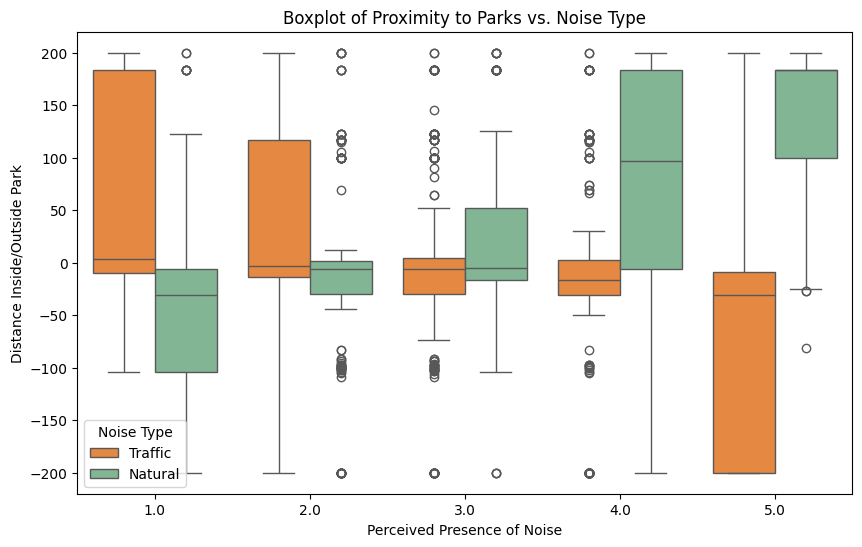

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_ssid is your DataFrame

# Melt the DataFrame to combine 'Traffic' and 'Natural' variables
melted_df = pd.melt(df_ssid, id_vars='PARKSDISTAN', value_vars=['Traffic', 'Natural'], var_name='Noise Type')

# Define a custom color palette
custom_palette = {'Traffic': '#ff8427', 'Natural': '#7abd91'}

# Create the boxplot
plt.figure(figsize=(10, 6))

# Boxplot combining Traffic and Natural sounds on the same axes
sns.boxplot(x='value', y='PARKSDISTAN', hue='Noise Type', data=melted_df, palette=custom_palette)

plt.title('Boxplot of Proximity to Parks vs. Noise Type')
plt.xlabel('Perceived Presence of Noise')
plt.ylabel('Distance Inside/Outside Park')
plt.legend(title='Noise Type')

plt.show()


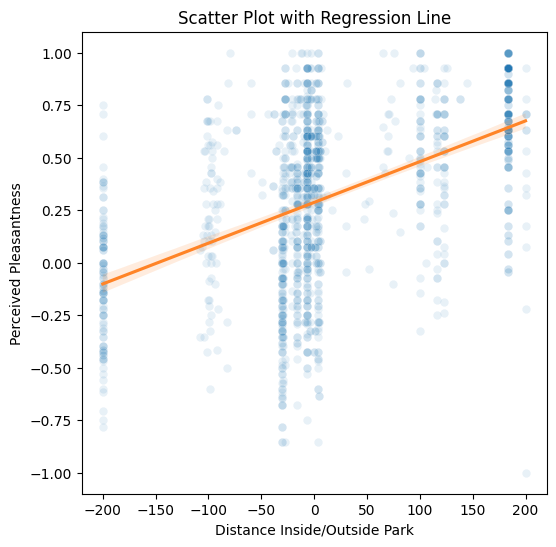

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_ssid is your DataFrame

# Create the scatter plot with a regression line
plt.figure(figsize=(6, 6))

# Scatter plot with transparency
sns.scatterplot(data=df_ssid, x="PARKSDISTAN", y="ISOPleasan", alpha=0.1)

# Adding the regression line
sns.regplot(data=df_ssid, x="PARKSDISTAN", y="ISOPleasan", scatter=False, color='#ff8427')

plt.title('Scatter Plot with Regression Line')
plt.xlabel('Distance Inside/Outside Park')
plt.ylabel('Perceived Pleasantness')

plt.show()


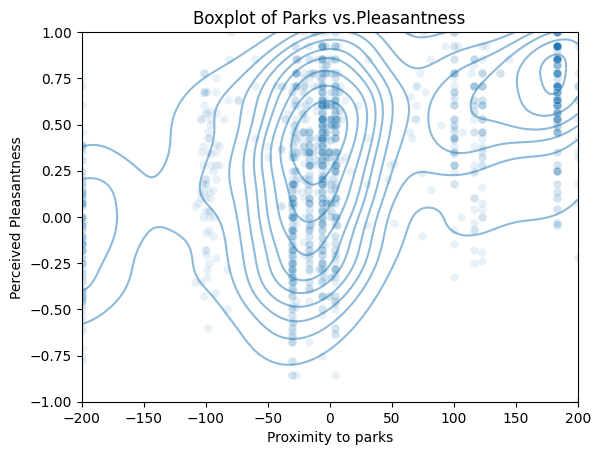

In [64]:
sns.scatterplot(data=df_ssid, x="PARKSDISTAN", y="ISOPleasan", alpha= 0.1)
sns.kdeplot(x='PARKSDISTAN', y='ISOPleasan', data=df_ssid, fill=False, bw_adjust=1, cut=0, alpha = 0.5)
plt.title('Boxplot of Parks vs.Pleasantness')
plt.xlabel('Proximity to parks')
plt.ylabel('Perceived Pleasantness')
plt.show()


<Axes: xlabel='ISOPleasan', ylabel='Density'>

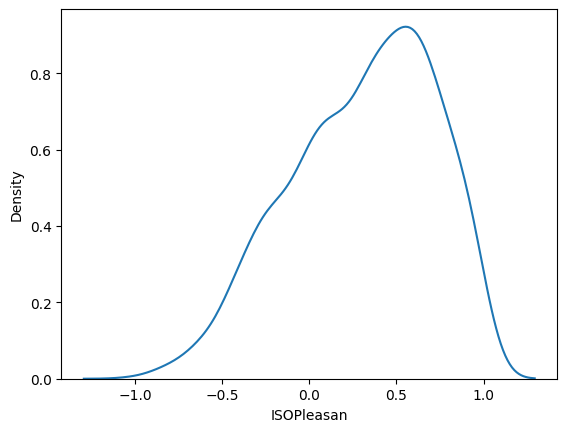

In [48]:
sns.kdeplot(data=df_ssid, x="ISOPleasan", bw_adjust=1)

<Axes: xlabel='PARKSDISTAN', ylabel='ISOPleasan'>

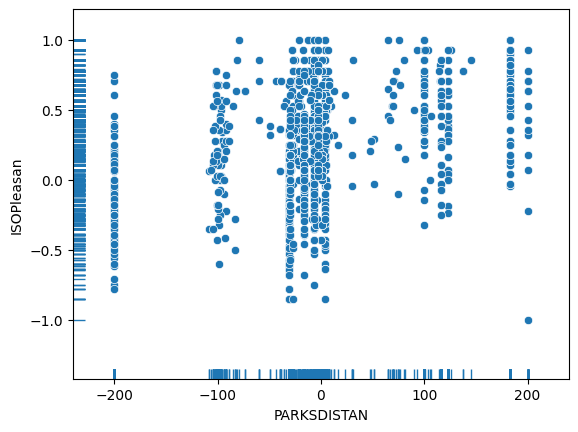

In [42]:
sns.scatterplot(data=df_ssid, x="PARKSDISTAN", y="ISOPleasan")
sns.rugplot(data=df_ssid, x="PARKSDISTAN", y="ISOPleasan")

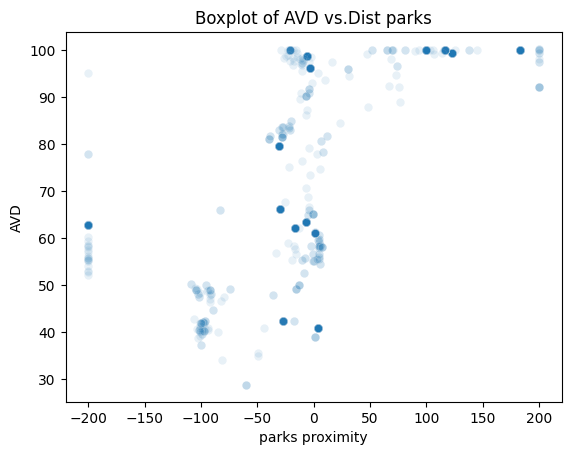

In [13]:
sns.scatterplot(x='PARKSDISTAN', y='DISTANCE', data=df_ssid, alpha = 0.1)
plt.title('Boxplot of AVD vs.Dist parks')
plt.xlabel('parks proximity')
plt.ylabel('AVD')
plt.show()

## trees visibilty

In [12]:
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['treesvisibi'], df_ssid['Natural'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

spearman_coefficient, p_value = spearmanr(filtered_df['treesvisibi'], filtered_df['Natural'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)


Spearman correlation coefficient: 0.02797299561473389
p-value: 0.3087468230737967
Spearman correlation coefficient: 0.3764141340234757
p-value: 2.0323210777195086e-19


In [13]:
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['treesvisibi'], df_ssid['Traffic'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

spearman_coefficient, p_value = spearmanr(filtered_df['treesvisibi'], filtered_df['Traffic'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)


Spearman correlation coefficient: 0.05660914652886642
p-value: 0.03929442689921717
Spearman correlation coefficient: -0.31129357573829924
p-value: 1.8348335254289127e-13


In [14]:
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['treesvisibi'], df_ssid['ISOPleasan'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

spearman_coefficient, p_value = spearmanr(filtered_df['treesvisibi'], filtered_df['ISOPleasan'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)


Spearman correlation coefficient: -0.020695587090798703
p-value: 0.45128810930235197
Spearman correlation coefficient: 0.3679454318781755
p-value: 1.4553236208318576e-18


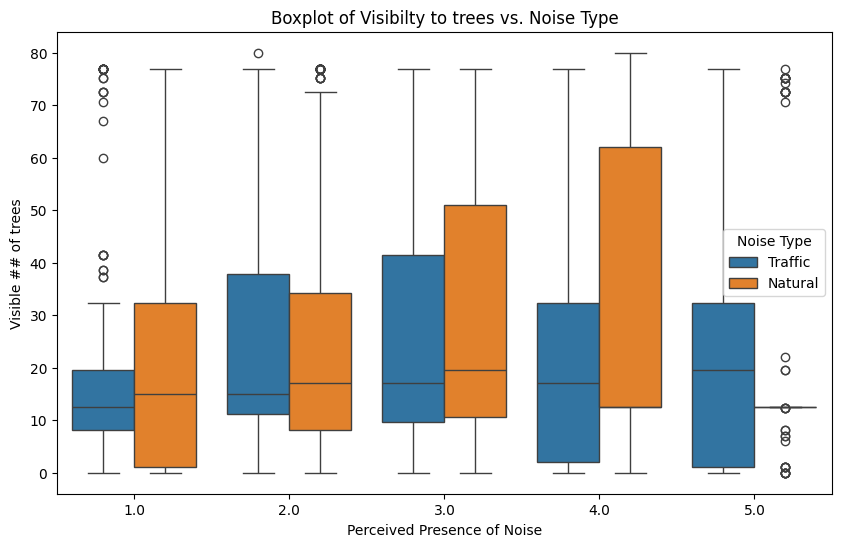

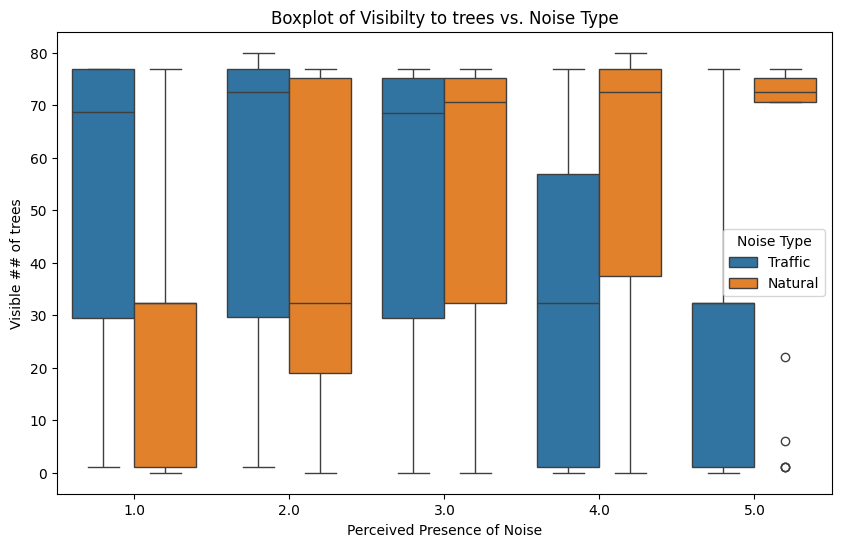

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_ssid is your DataFrame

# Melt the DataFrame to combine 'Traffic' and 'Natural' variables
melted_df = pd.melt(df_ssid, id_vars='treesvisibi', value_vars=['Traffic', 'Natural'], var_name='Noise Type')

# Create the boxplot
plt.figure(figsize=(10, 6))

# Boxplot combining Traffic and Natural sounds on the same axes
sns.boxplot(x='value', y='treesvisibi', hue='Noise Type', data=melted_df)

plt.title('Boxplot of Visibilty to trees vs. Noise Type')
plt.xlabel('Perceived Presence of Noise')
plt.ylabel('Visible ## of trees')
plt.legend(title='Noise Type')

# Melt the DataFrame to combine 'Traffic' and 'Natural' variables
melted_df = pd.melt(filtered_df, id_vars='treesvisibi', value_vars=['Traffic', 'Natural'], var_name='Noise Type')

# Create the boxplot
plt.figure(figsize=(10, 6))

# Boxplot combining Traffic and Natural sounds on the same axes
sns.boxplot(x='value', y='treesvisibi', hue='Noise Type', data=melted_df)

plt.title('Boxplot of Visibilty to trees vs. Noise Type')
plt.xlabel('Perceived Presence of Noise')
plt.ylabel('Visible ## of trees')
plt.legend(title='Noise Type')




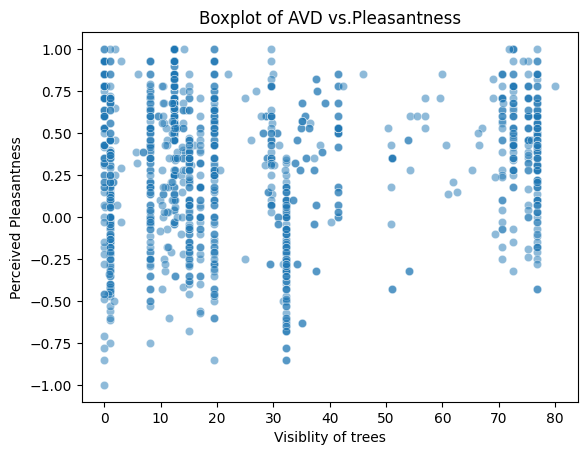

In [38]:
sns.scatterplot(x='treesvisibi', y='ISOPleasan', data=df_ssid, alpha = 0.5)
plt.title('Boxplot of AVD vs.Pleasantness')
plt.xlabel('Visiblity of trees')
plt.ylabel('Perceived Pleasantness')
plt.show()

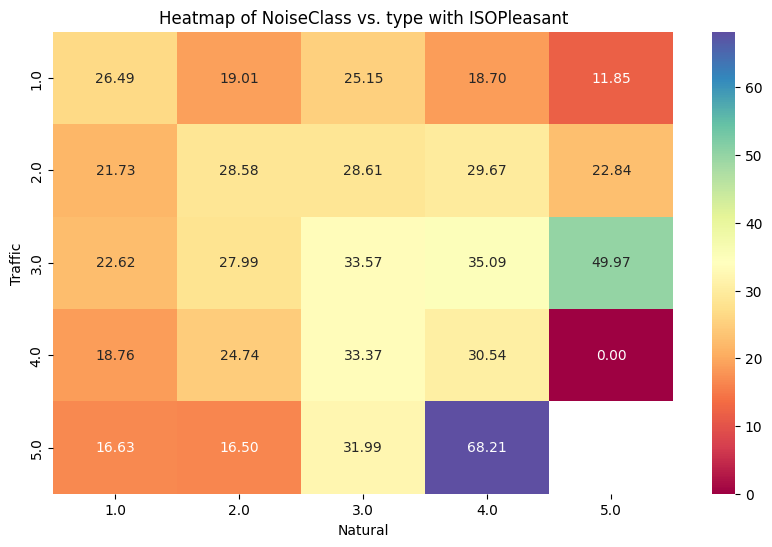

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_ssid is your dataframe
# Assuming Mod_CLUSTER_CO and type are your columns of interest

# Pivot the dataframe to create a matrix suitable for heatmap
heatmap_data = df_ssid.pivot_table(index='Traffic', columns='Natural', values='treesvisibi', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='Spectral', annot=True, fmt='.2f')

plt.title('Heatmap of NoiseClass vs. type with ISOPleasant')
plt.xlabel('Natural')
plt.ylabel('Traffic')
plt.show()

## fountains

In [204]:
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['fountainsvi'], df_ssid['Natural'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

spearman_coefficient, p_value = spearmanr(filtered_df['fountainsvi'], filtered_df['Natural'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)


Spearman correlation coefficient: 0.4319137592952654
p-value: 2.2045012415578684e-61
Spearman correlation coefficient: 0.4454036036343361
p-value: 2.196862245350254e-27


In [205]:
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['fountainsvi'], df_ssid['Traffic'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

spearman_coefficient, p_value = spearmanr(filtered_df['fountainsvi'], filtered_df['Traffic'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)


Spearman correlation coefficient: -0.22792350925472823
p-value: 4.364032712233654e-17
Spearman correlation coefficient: -0.18031446854433011
p-value: 2.7720741586558003e-05


In [206]:
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['fountainsvi'], df_ssid['ISOPleasan'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

spearman_coefficient, p_value = spearmanr(filtered_df['fountainsvi'], filtered_df['ISOPleasan'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)


Spearman correlation coefficient: 0.4221019390011772
p-value: 1.806710220280734e-58
Spearman correlation coefficient: 0.42124414039206254
p-value: 2.2090317411856903e-24


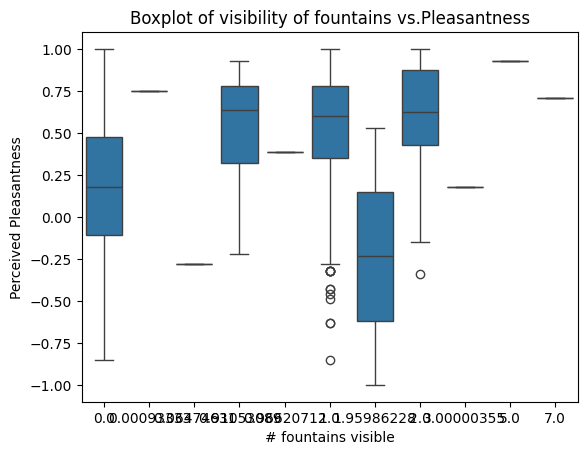

In [24]:
sns.boxplot(x='fountainsvi', y='ISOPleasan', data=df_ssid)
plt.title('Boxplot of visibility of fountains vs.Pleasantness')
plt.xlabel('# fountains visible')
plt.ylabel('Perceived Pleasantness')
plt.show()


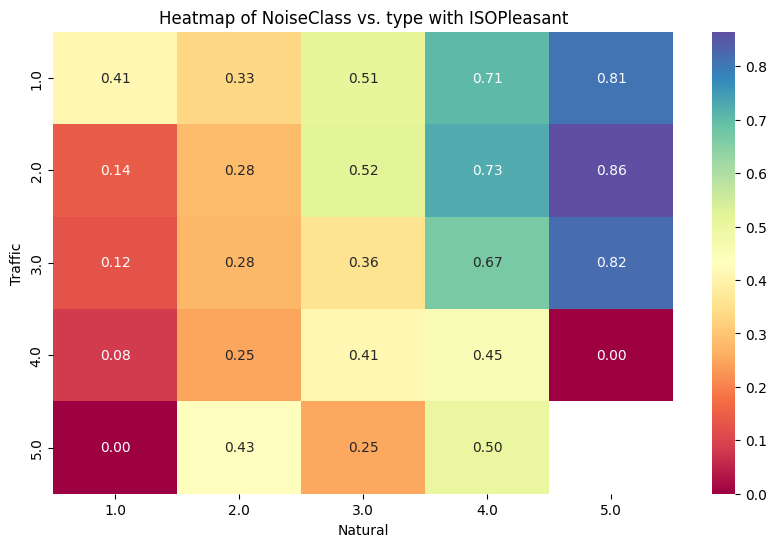

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_ssid is your dataframe
# Assuming Mod_CLUSTER_CO and type are your columns of interest

# Pivot the dataframe to create a matrix suitable for heatmap
heatmap_data = df_ssid.pivot_table(index='Traffic', columns='Natural', values='fountainsvi', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='Spectral', annot=True, fmt='.2f')

plt.title('Heatmap of NoiseClass vs. type with ISOPleasant')
plt.xlabel('Natural')
plt.ylabel('Traffic')
plt.show()

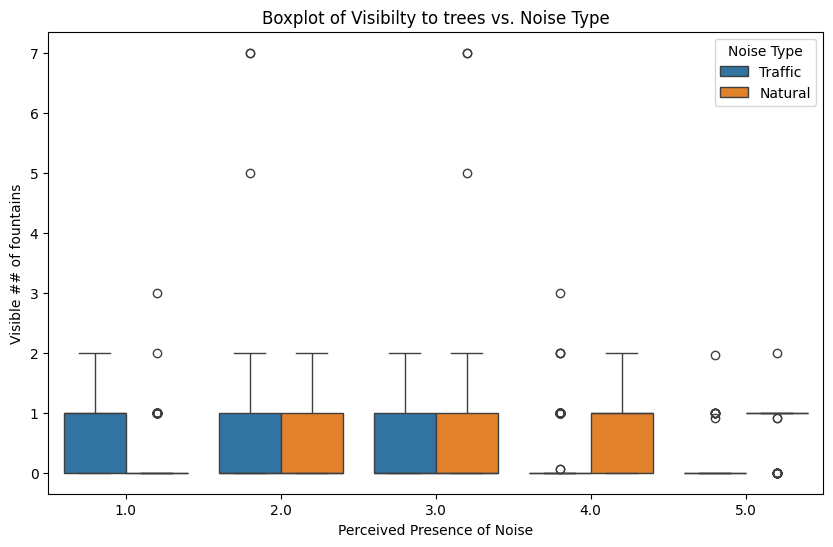

In [208]:
# Melt the DataFrame to combine 'Traffic' and 'Natural' variables
melted_df = pd.melt(df_ssid, id_vars='fountainsvi', value_vars=['Traffic', 'Natural'], var_name='Noise Type')

# Create the boxplot
plt.figure(figsize=(10, 6))

# Boxplot combining Traffic and Natural sounds on the same axes
sns.boxplot(x='value', y='fountainsvi', hue='Noise Type', data=melted_df)

plt.title('Boxplot of Visibilty to trees vs. Noise Type')
plt.xlabel('Perceived Presence of Noise')
plt.ylabel('Visible ## of fountains')
plt.legend(title='Noise Type')

plt.show()
plt.show()

## building types

In [149]:
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['SVF'], df_ssid['ISOPleasan'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

spearman_coefficient, p_value = spearmanr(filtered_df['SVF'], filtered_df['ISOPleasan'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

Spearman correlation coefficient: 0.32332077932168035
p-value: 8.495297907930919e-33
Spearman correlation coefficient: 0.5758131823902088
p-value: 5.461414363488217e-47


In [150]:
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['VISIBLE'], df_ssid['ISOPleasan'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

spearman_coefficient, p_value = spearmanr(filtered_df['VISIBLE'], filtered_df['ISOPleasan'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

Spearman correlation coefficient: 0.34195570464160335
p-value: 1.0067995758734535e-36
Spearman correlation coefficient: 0.5834795071194074
p-value: 1.7169549809819373e-48


In [151]:
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['DISTANCE'], df_ssid['ISOPleasan'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

spearman_coefficient, p_value = spearmanr(filtered_df['DISTANCE'], filtered_df['ISOPleasan'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

Spearman correlation coefficient: 0.3569245152843659
p-value: 4.455015026691713e-40
Spearman correlation coefficient: 0.5740220805628108
p-value: 1.2096661065074505e-46


In [152]:
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['SVF'], df_ssid['Natural'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

spearman_coefficient, p_value = spearmanr(filtered_df['SVF'], filtered_df['Natural'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

Spearman correlation coefficient: 0.4041785805481857
p-value: 7.134813610381547e-52
Spearman correlation coefficient: 0.5307382083603353
p-value: 6.610418358576135e-39


In [153]:
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['VISIBLE'], df_ssid['Natural'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

spearman_coefficient, p_value = spearmanr(filtered_df['VISIBLE'], filtered_df['Natural'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

Spearman correlation coefficient: 0.4302030136095363
p-value: 2.9623835639886295e-59
Spearman correlation coefficient: 0.5425044762750816
p-value: 6.719717272586606e-41


In [154]:
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['DISTANCE'], df_ssid['Natural'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

spearman_coefficient, p_value = spearmanr(filtered_df['DISTANCE'], filtered_df['Natural'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

Spearman correlation coefficient: 0.442192823992073
p-value: 7.025788814816172e-63
Spearman correlation coefficient: 0.5367266757604551
p-value: 6.542685283963699e-40


In [155]:
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['SVF'], df_ssid['Traffic'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

spearman_coefficient, p_value = spearmanr(filtered_df['SVF'], filtered_df['Traffic'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

Spearman correlation coefficient: -0.19132132509223973
p-value: 4.236868548799356e-12
Spearman correlation coefficient: -0.40246233096347833
p-value: 1.4976306957677928e-21


In [156]:
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['VISIBLE'], df_ssid['Traffic'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

spearman_coefficient, p_value = spearmanr(filtered_df['VISIBLE'], filtered_df['Traffic'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

Spearman correlation coefficient: -0.20137844552134399
p-value: 2.8621412599487766e-13
Spearman correlation coefficient: -0.41059997681982563
p-value: 1.9075176195526156e-22


In [121]:
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['DISTANCE'], df_ssid['Traffic'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

spearman_coefficient, p_value = spearmanr(filtered_df['DISTANCE'], filtered_df['Traffic'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

Spearman correlation coefficient: -0.22492355196341682
p-value: 1.000016205742417e-16
Spearman correlation coefficient: -0.42119068504176843
p-value: 2.2417146386839497e-24


In [211]:
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['SVF'], df_ssid['VISIBLE'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

spearman_coefficient, p_value = spearmanr(filtered_df['SVF'], filtered_df['VISIBLE'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

Spearman correlation coefficient: 0.984559471604705
p-value: 0.0
Spearman correlation coefficient: 0.9962833840573586
p-value: 0.0


In [118]:
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['vi20mbigger'], df_ssid['ISOPleasan'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

spearman_coefficient, p_value = spearmanr(filtered_df['vi20mbigger'], filtered_df['ISOPleasan'], nan_policy = 'omit')

print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

Spearman correlation coefficient: 0.1346937346952938
p-value: 8.066846064821003e-07
Spearman correlation coefficient: 0.2172514601576554
p-value: 3.9939233306775525e-07


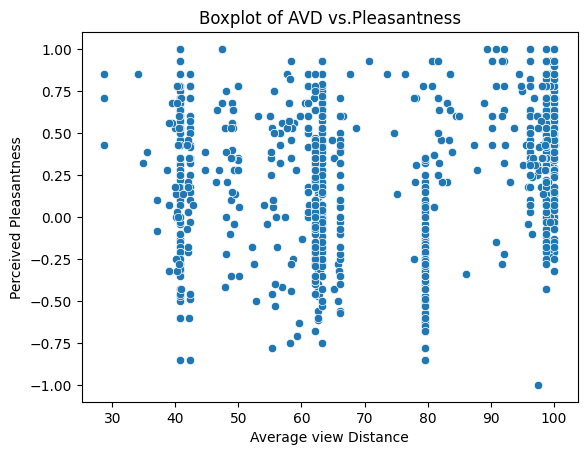

In [32]:
sns.scatterplot(x='DISTANCE', y='ISOPleasan', data=df_ssid)
plt.title('Boxplot of AVD vs.Pleasantness')
plt.xlabel('Average view Distance')
plt.ylabel('Perceived Pleasantness')
plt.show()

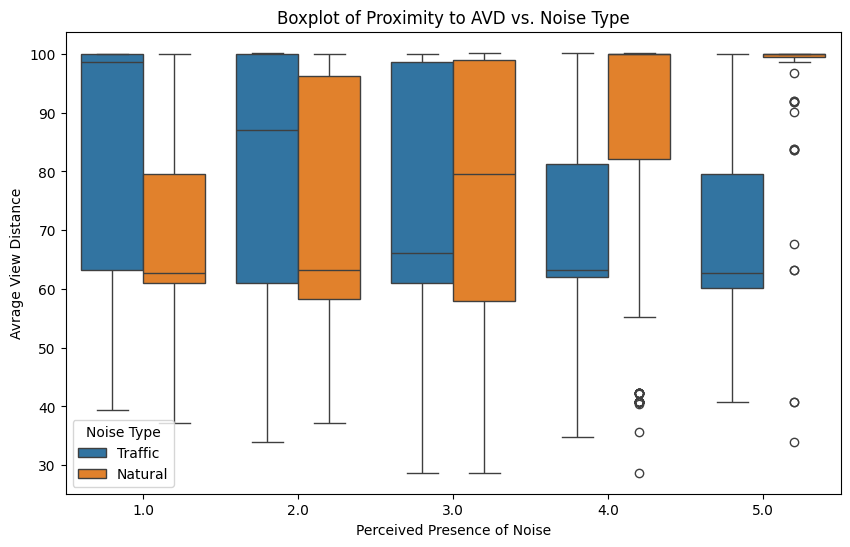

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_ssid is your DataFrame

# Melt the DataFrame to combine 'Traffic' and 'Natural' variables
melted_df = pd.melt(df_ssid, id_vars='DISTANCE', value_vars=['Traffic', 'Natural'], var_name='Noise Type')

# Create the boxplot
plt.figure(figsize=(10, 6))

# Boxplot combining Traffic and Natural sounds on the same axes
sns.boxplot(x='value', y='DISTANCE', hue='Noise Type', data=melted_df)

plt.title('Boxplot of Proximity to AVD vs. Noise Type')
plt.xlabel('Perceived Presence of Noise')
plt.ylabel('Avrage View Distance')
plt.legend(title='Noise Type')

plt.show()

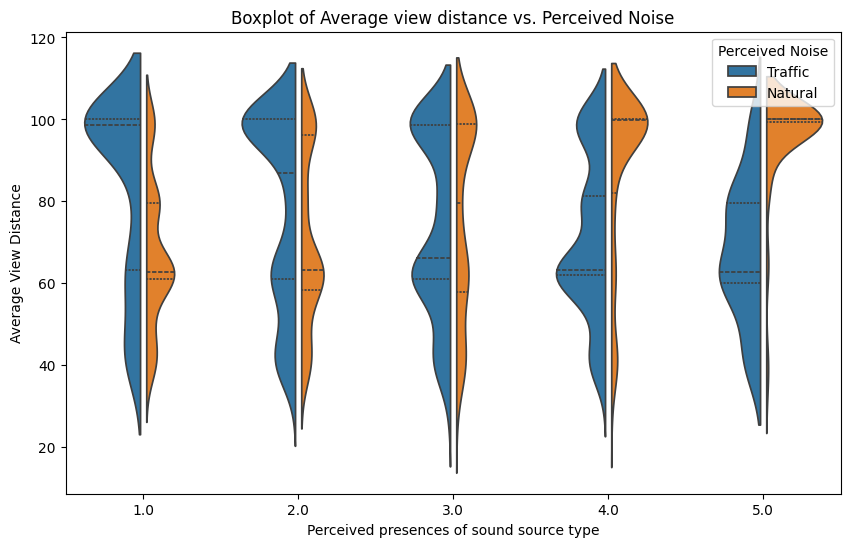

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Melt the dataframe to combine 'Traffic' and 'Natural' variables
melted_df = pd.melt(df_ssid, id_vars='DISTANCE', value_vars=['Traffic', 'Natural'], var_name='Perceived Noise')

# Assuming category_order is defined
# category_order = [">75", "70.0-74.9", "65.0-69.9", "60.0-64.9", "55.0-59.9", "<55"]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='value', y='DISTANCE', hue='Perceived Noise', data=melted_df, split = True, gap=.1, inner="quart")
# Boxplot combining Traffic and Natural sounds on the same axes
# sns.boxplot(x='value', y='treesvisibi', hue='Noise Type', data=melted_df)

plt.title('Boxplot of Average view distance vs. Perceived Noise')
plt.xlabel('Perceived presences of sound source type')
plt.ylabel('Average View Distance')
plt.legend(title='Perceived Noise')
plt.show()


# urban types

In [36]:
df_ssid.head()

,fid,LocationID,SessionID,GroupID,RecordID,Language,Lockdown,start_time,end_time,latitude,...,SrcCode,ImagesSpr,ImagesAut,GlobalID,Mod_REGION_NAM,Mod_CLUSTER_CO,Mod_CLUSTER_LA,code,type,NoiseCla_2
0,1,CamdenTown,CamdenTown1,CT101,525,NaN,(0),2-5-2019 11:40,2-5-2019 11:43,51.539124,...,20,01/04/2021 - 30/04/2021,01/09/2020 - 30/09/2020,f6e78d17-e13f-49a5-850a-6402d227cc06,London,8,Central Business District,LOU,Local urbanity,>75
1,2,CamdenTown,CamdenTown1,CT101,561,NaN,(0),2-5-2019 11:40,2-5-2019 11:43,51.539124,...,20,01/04/2021 - 30/04/2021,01/09/2020 - 30/09/2020,f6e78d17-e13f-49a5-850a-6402d227cc06,London,8,Central Business District,LOU,Local urbanity,>75
2,3,CamdenTown,CamdenTown1,CT101,526,NaN,(0),2-5-2019 11:41,2-5-2019 11:44,51.539124,...,20,01/04/2021 - 30/04/2021,01/09/2020 - 30/09/2020,f6e78d17-e13f-49a5-850a-6402d227cc06,London,8,Central Business District,LOU,Local urbanity,>75
3,4,CamdenTown,CamdenTown1,CT102,560,NaN,(0),2-5-2019 11:50,2-5-2019 11:53,51.539124,...,20,01/04/2021 - 30/04/2021,01/09/2020 - 30/09/2020,f6e78d17-e13f-49a5-850a-6402d227cc06,London,8,Central Business District,LOU,Local urbanity,>75
4,5,CamdenTown,CamdenTown1,CT103,527,NaN,(0),2-5-2019 11:49,2-5-2019 11:54,51.539124,...,20,01/04/2021 - 30/04/2021,01/09/2020 - 30/09/2020,f6e78d17-e13f-49a5-850a-6402d227cc06,London,8,Central Business District,LOU,Local urbanity,>75


In [35]:
# Filter rows where NoiseCla_1 is not equal to 6
filtered_df = df_ssid[df_ssid['NoiseCla_1'] != 6]

print('MODCLUSTER')
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['Mod_CLUSTER_CO'], df_ssid['ISOPleasan'], nan_policy = 'omit')
print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(filtered_df['Mod_CLUSTER_CO'], filtered_df['ISOPleasan'], nan_policy = 'omit')
print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)

print('urban type')
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(df_ssid['type'], df_ssid['ISOPleasan'], nan_policy = 'omit')
print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)
# Calculate Spearman correlation coefficient and p-value
spearman_coefficient, p_value = spearmanr(filtered_df['type'], filtered_df['ISOPleasan'], nan_policy = 'omit')
print("Spearman correlation coefficient:", spearman_coefficient)
print("p-value:", p_value)


MODCLUSTER
Spearman correlation coefficient: -0.15410168262666066
p-value: 4.382722624627877e-06
Spearman correlation coefficient: -0.7327204254986075
p-value: 2.485886628206896e-65
urban type
Spearman correlation coefficient: 0.17745141816437096
p-value: 1.1664044414872997e-07
Spearman correlation coefficient: -0.09081281279571833
p-value: 0.07665540559268937


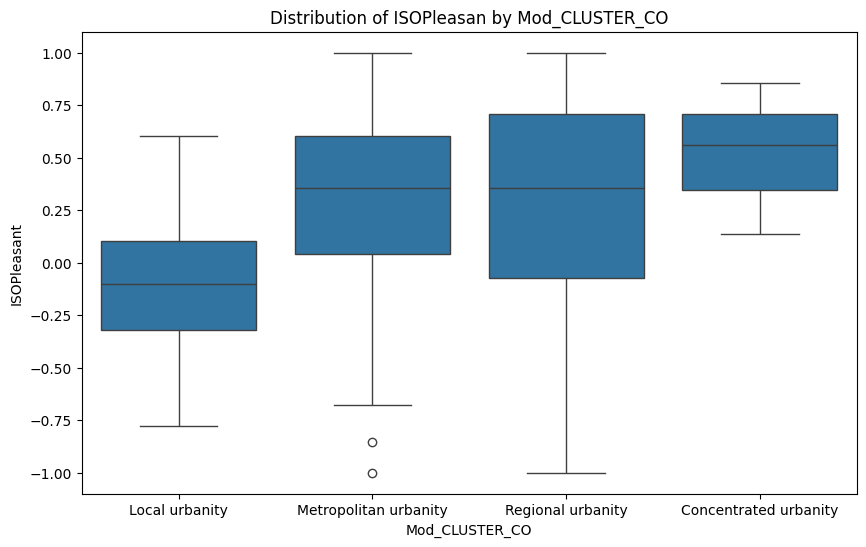

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_ssid is your dataframe
# You can adjust the figure size as needed
plt.figure(figsize=(10, 6))

# Create a boxplot or violin plot
sns.boxplot(x='type', y='ISOPleasan', data=df_ssid)
# Uncomment the line below and comment out the above line to use a violin plot instead
# sns.violinplot(x='A_pred', y='ISOPleasan', data=df_ssid)

plt.title('Distribution of ISOPleasan by Mod_CLUSTER_CO')
plt.xlabel('Mod_CLUSTER_CO')
plt.ylabel('ISOPleasant')
plt.show()


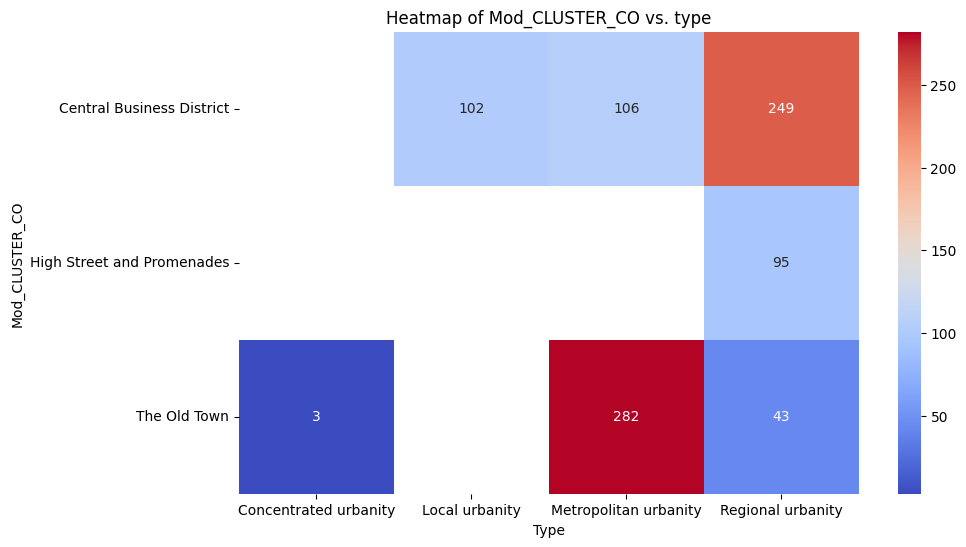

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_ssid is your dataframe
# Assuming Mod_CLUSTER_CO and type are your columns of interest

# Pivot the dataframe to create a matrix suitable for heatmap
heatmap_data = df_ssid.pivot_table(index='Mod_CLUSTER_LA', columns='type', aggfunc='size')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='g')

plt.title('Heatmap of Mod_CLUSTER_CO vs. type')
plt.xlabel('Type')
plt.ylabel('Mod_CLUSTER_CO')
plt.show()



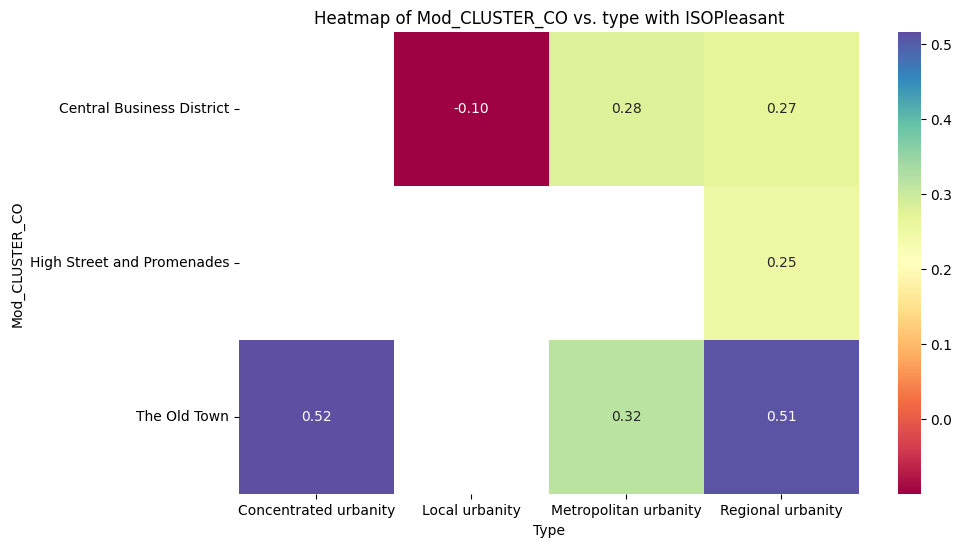

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_ssid is your dataframe
# Assuming Mod_CLUSTER_CO and type are your columns of interest

# Pivot the dataframe to create a matrix suitable for heatmap
heatmap_data = df_ssid.pivot_table(index='Mod_CLUSTER_LA', columns='type', values='ISOPleasan', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='Spectral', annot=True, fmt='.2f')

plt.title('Heatmap of Mod_CLUSTER_CO vs. type with ISOPleasant')
plt.xlabel('Type')
plt.ylabel('Mod_CLUSTER_CO')
plt.show()


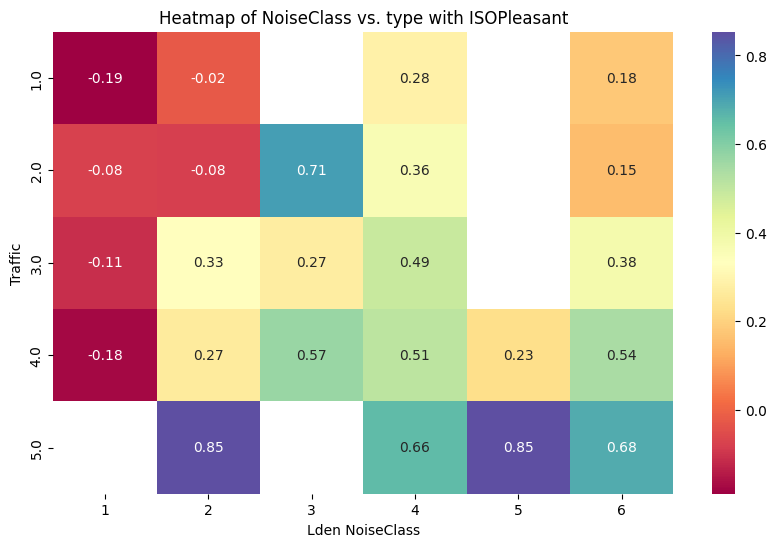

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_ssid is your dataframe
# Assuming Mod_CLUSTER_CO and type are your columns of interest

# Pivot the dataframe to create a matrix suitable for heatmap
heatmap_data = df_ssid.pivot_table(index='Natural', columns='NoiseCla_1', values='ISOPleasan', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='Spectral', annot=True, fmt='.2f')

plt.title('Heatmap of NoiseClass vs. type with ISOPleasant')
plt.xlabel('Lden NoiseClass')
plt.ylabel('Traffic')
plt.show()